
# Project by Pratiti Soumya: Investigate a Dataset - tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, I used a cleaned version of the TMDb movie dataset, which includes information on over 10,000 films. Each row represents a single movie and includes details such as title, release year, genre, budget, revenue, popularity, runtime, user ratings, and vote count. Some fields, like genres and cast, contain multiple values separated by a pipe (`|`). The dataset also includes values for budget and revenue.

### Question(s) for Analysis

For this project, I will explore the following 3 questions using the TMDb movie dataset. Each question has been selected for its potential to reveal meaningful trends and patterns that can be visualized using bar plots or scatter plots:

1. **Do movies with higher budgets tend to earn higher revenue?**  
   → This question explores the relationship between how much is spent on a movie and how much it earns, using a scatter plot to identify any trends.

2. **Which genres have the highest average popularity?**  
   → This question analyzes popularity scores by genre, identifying which types of movies tend to attract more attention.

3. **How has the average movie runtime changed over the years?**  
   → By grouping movies by release year and calculating their average runtime, this question examines how the length of movies has evolved over time.


Each of these questions will be addressed through data cleaning, analysis, and visualization using Python libraries such as Pandas, NumPy, and Matplotlib.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("tmdb-movies.csv") # read the data into pandas dataframe
df.info() # explore data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id='wrangling'></a>
## Data Wrangling


### Dropping Unnecessary Columns

To simplify the dataset and focus on the five specific questions being analyzed, I first removed columns that are not relevant to this investigation. These included identifiers, URLs, and text-heavy fields such as `overview`, `tagline`, and `keywords`, which are not useful for numeric or visual analysis.

The columns dropped were: `id`, `imdb_id`, `homepage`, `overview`, `tagline`, `keywords`, `production_companies`, and `cast`.


In [6]:
columns_to_drop = ['id', 'imdb_id', 'homepage', 'overview', 'tagline','keywords', 'production_companies', 'cast'] # Drop columns that are not needed for this analysis
df.drop(columns=columns_to_drop, inplace=True)
df

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


### Checking for Duplicate Rows

Next, I checked for duplicate rows in the dataset. Duplicate rows can skew the results of an analysis, especially when aggregating values like revenue, vote count, or popularity.

In [8]:
duplicates=df.duplicated().sum() #check for duplicate rows
if duplicates>0:
    df.drop_duplicates(inplace=True) #drop duplicates if found
    print(f"{duplicates} duplicate rows removed") 
else:
    print("no duplicates found")

1 duplicate rows removed


### Checking for Missing Values

In this step, I examined the dataset for any missing values. For numeric columns, I replace missing values using the column mean.


In [10]:
df.isnull().sum() #find missing values

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [11]:
df.dropna(inplace=True) # Drop rows where 'director' or 'genres' are missing
df.isnull().sum().sum() # Confirm no missing values remain

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10800 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10800 non-null  float64
 1   budget          10800 non-null  int64  
 2   revenue         10800 non-null  int64  
 3   original_title  10800 non-null  object 
 4   director        10800 non-null  object 
 5   runtime         10800 non-null  int64  
 6   genres          10800 non-null  object 
 7   release_date    10800 non-null  object 
 8   vote_count      10800 non-null  int64  
 9   vote_average    10800 non-null  float64
 10  release_year    10800 non-null  int64  
 11  budget_adj      10800 non-null  float64
 12  revenue_adj     10800 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


### Check for special characters in any string columns

In [14]:
df.head(10) #check for multiple values in a column

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [15]:
df['genres']= df['genres'].str.strip().str.split("|")
df=df.explode('genres').reset_index(drop=True) #Split the 'genres' column on pipe and create multiple rows per movie (one per genre)
df.info()   
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26864 entries, 0 to 26863
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      26864 non-null  float64
 1   budget          26864 non-null  int64  
 2   revenue         26864 non-null  int64  
 3   original_title  26864 non-null  object 
 4   director        26864 non-null  object 
 5   runtime         26864 non-null  int64  
 6   genres          26864 non-null  object 
 7   release_date    26864 non-null  object 
 8   vote_count      26864 non-null  int64  
 9   vote_average    26864 non-null  float64
 10  release_year    26864 non-null  int64  
 11  budget_adj      26864 non-null  float64
 12  revenue_adj     26864 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 2.7+ MB


<a id='eda'></a>
## Exploratory Data Analysis
### Do movies with higher budgets tend to earn higher revenue?


In [17]:
df[['budget','revenue']].describe()
df_money= df[(df['budget']>0) & (df['revenue']>0)]# filter for rows with budget and revenue>0

In [18]:
def plot_fn(df,x_axis,y_axis,plot_kind,plot_title,x_label,y_label): #function definition for plotting a scatter plot
    df.plot(x=x_axis,y=y_axis,kind=plot_kind, title=plot_title, figsize=(8,6)); 
    plt.xlabel(x_label)  #add x label
    plt.ylabel(y_label)  #add y label
    plt.show()

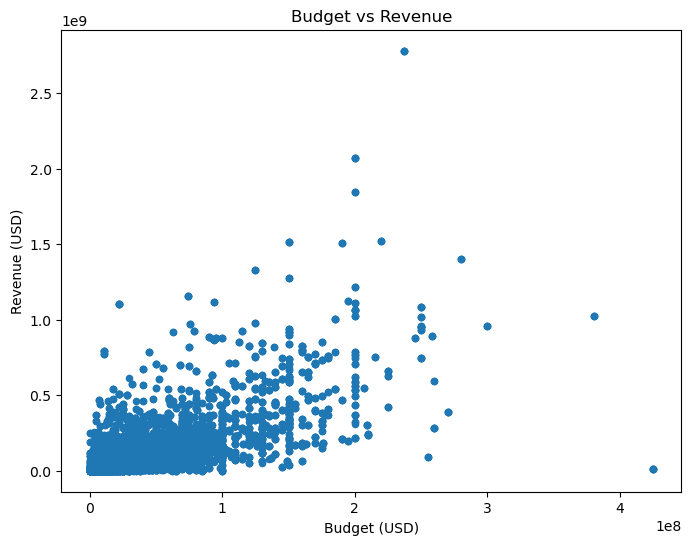

In [19]:
plot_fn(df_money,'budget','revenue','scatter','Budget vs Revenue', 'Budget (USD)', 'Revenue (USD)') #function call for scatter plot

The above plot is highly skewed, so I will use log scale to reduce skew

In [21]:
df_money['log10budget']=np.log10(df['budget']) #log budget
df_money['log10revenue']=np.log10(df['revenue']) #log revenue

C:\Users\prati\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\prati\AppData\Local\Temp\ipykernel_18544\1251285516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_money['log10budget']=np.log10(df['budget']) #log budget
C:\Users\prati\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\prati\AppData\Local\Temp\ipykernel_18544\1251285516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

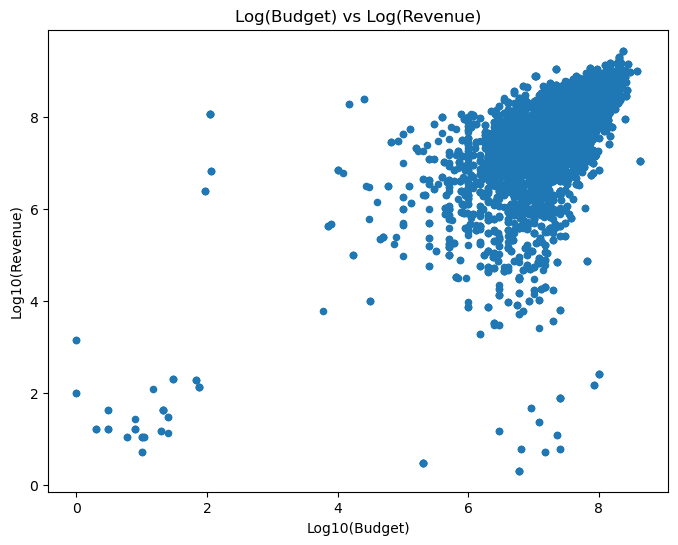

In [22]:
plot_fn(df_money,'log10budget','log10revenue','scatter','Log(Budget) vs Log(Revenue)', 'Log10(Budget)', 'Log10(Revenue)') #function call for scatter plot of log(Budget) vs Log(Revenue)

#### Conclusion 

After applying a log transformation to both budget and revenue, I created a scatter plot to see if there’s any pattern. The result shows a clear upward trend — movies with higher budgets generally earn more revenue. Most of the points form a diagonal cluster in the top right, which supports that idea.

The log transformation helped reduce the impact of extreme values and made the overall pattern easier to see. There are still a few outliers, like low-budget films that made a lot of money, but they’re rare.


In [24]:
correlation = df_money['log10budget'].corr(df_money['log10revenue']) #calculate correlation coefficient
print(f"Correlation between log(budget) and log(revenue): {correlation:.2f}")

Correlation between log(budget) and log(revenue): 0.65


To back this up, I also calculated the correlation between log-budget and log-revenue. It came out to **0.65**, which means there's a moderately strong positive relationship between the two.

So overall, the data shows that spending more on a movie tends to be linked with higher box office returns.

### Research Question 2: Which genres have the highest average popularity?

In this question, I wanted to find out which types of movies tend to be the most popular. Since a movie can belong to multiple genres, I first split the `genres` column using `.str.split('|')` and then used `.explode()` to create one row per genre. I then calculated the average popularity for each genre in the data preparation step. Here, I visualized the results.


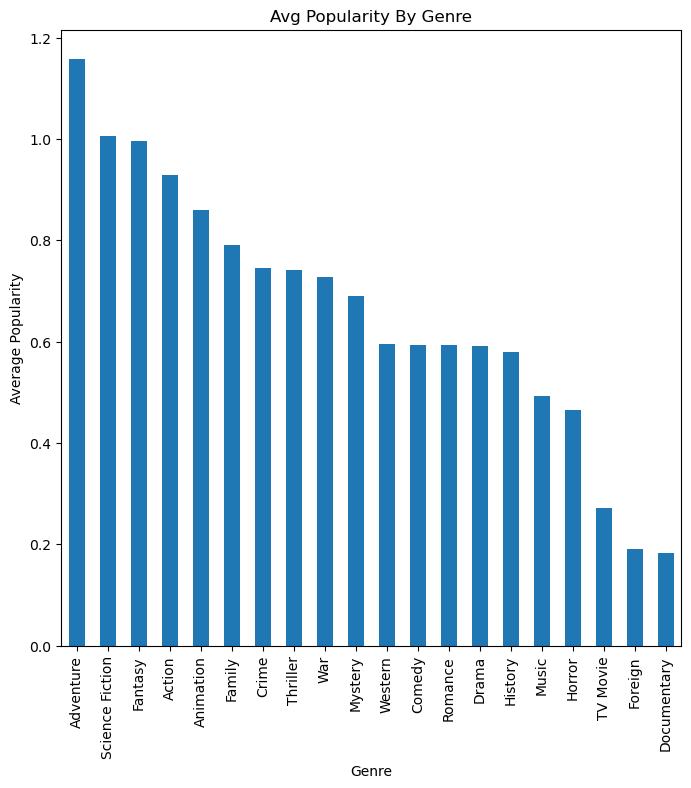

In [27]:
df_popular= df.groupby(by='genres')['popularity'].mean().sort_values(ascending=False) # Group by genre and calculate average popularity
df_popular.plot(kind='bar', figsize=(8,8), title='Avg Popularity By Genre');
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.show()

#### Conclusion 

The bar chart shows the average popularity for each genre. I noticed that **Adventure** had the highest average, followed by **Science Fiction**.

This tells me that audiences are especially drawn to big, imaginative genres — possibly because these kinds of movies often come with high production value, exciting visuals, or popular franchises that boost their appeal.

### Research Question 3: Average movie runtime delta over the years

In this question, I wanted to find out whether movies have become longer or shorter over time. To explore this, I grouped the data by release year and calculated the average runtime for each year. Then I created a line plot to visualize the trend.

In [30]:
df_runtime=df.groupby(by='release_year')['runtime'].mean() #Group by release year and calculate average runtime

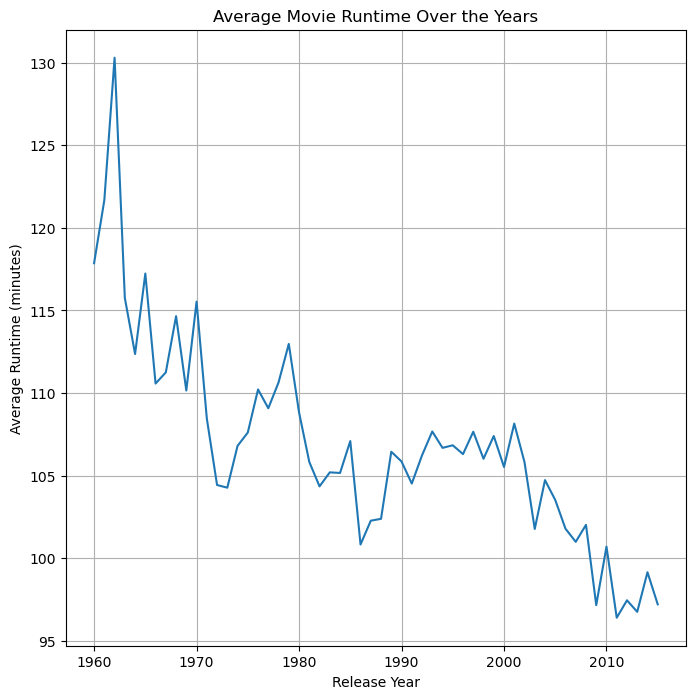

In [31]:
# Plot the trend
df_runtime.plot(kind='line', figsize=(8, 8), title='Average Movie Runtime Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime (minutes)')
plt.grid(True)
plt.show()

#### Conclusion 

From the line chart, I can see that average movie runtimes were generally higher in the 1960s, often above 120 minutes. Over time, runtimes gradually decreased, especially after the 1980s.

In more recent years, the average has stayed closer to 100 minutes. So overall, it looks like movies today are a bit shorter than they used to be. This could be due to changes in audience attention spans, storytelling styles, or production choices.


<a id='conclusions'></a>
## Conclusions

In this project, I explored three questions using the TMDb movie dataset:

1. I looked at the relationship between movie budgets and revenue. After applying a log transformation and creating a scatter plot, I noticed a clear upward trend — movies with larger budgets often earned more. The correlation between budget and revenue was about 0.65, showing a moderately strong positive relationship. However, this doesn't mean that spending more will always leads to higher revenue as other factors may play a role too.

2. I found that genres like Adventure, Science Fiction, and Fantasy have the highest average popularity. These genres probably stand out because they often include large franchises and have broad audience appeal.

3. When I looked at average movie runtimes over the years, I saw that films were longer in the 1960s, often over 120 minutes. Since then, runtimes have gradually dropped, with movies in the late 2010s averaging closer to 100 minutes.

One limitation of this analysis is that I focused only on numerical trends. Factors like marketing or release timing weren’t included. Also, just because two things are related — like budget and revenue — doesn’t mean one directly causes the other.

Overall, this project helped me practice working with real-world data, cleaning and preparing it, spotting patterns, and using visualizations to tell a story.


In [34]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 321888 bytes to Investigate_a_Dataset.html
